In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [4]:
data["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

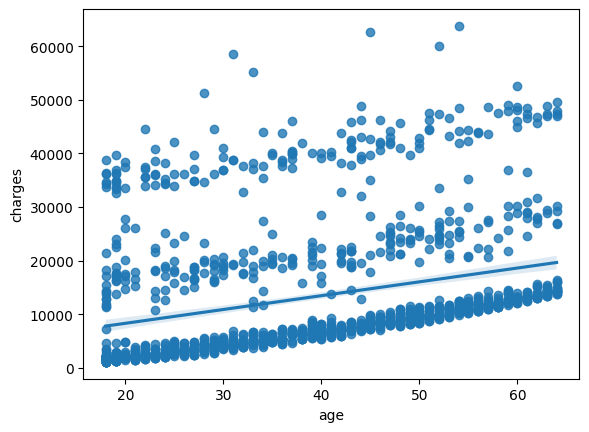

In [5]:
sns.regplot(x="age",y="charges",data=data)

<Axes: xlabel='sex', ylabel='charges'>

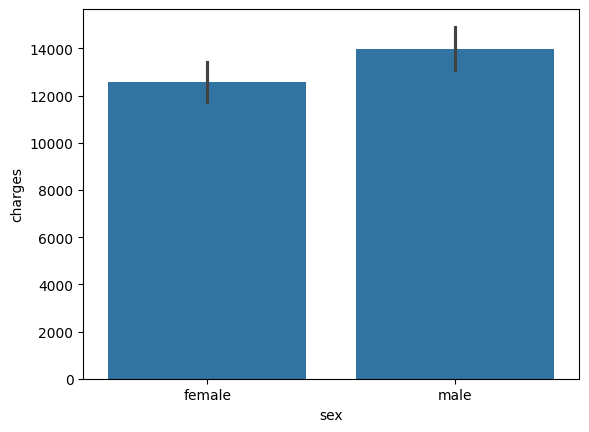

In [6]:
sns.barplot(x="sex",y="charges",data=data)

<Axes: xlabel='bmi', ylabel='charges'>

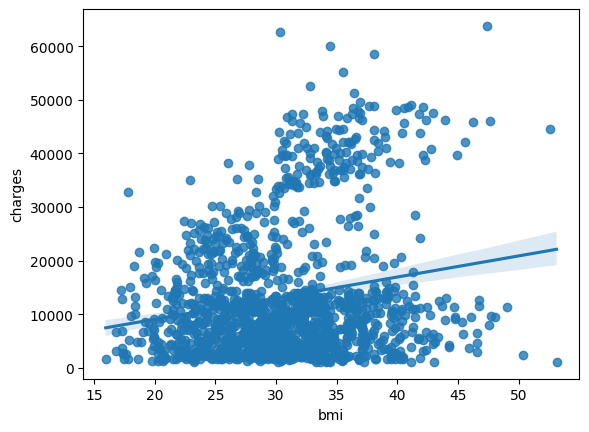

In [7]:
sns.regplot(x="bmi",y="charges",data=data)

In [8]:
data=data.drop(["children"],axis=1)

<Axes: xlabel='smoker', ylabel='charges'>

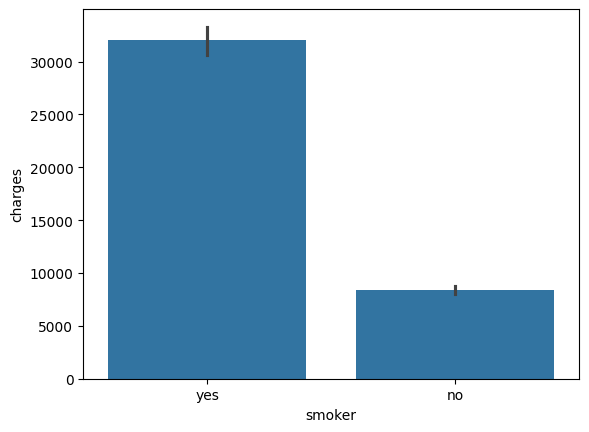

In [9]:
sns.barplot(x="smoker",y="charges",data=data)

In [10]:
data=data.drop(["region"],axis=1)

In [11]:
gender_map = {'female': 1, 'male': 0}
data['sex'] = data['sex'].replace(gender_map)

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_2628/2569081447.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace(gender_map)


In [12]:
sm = {'yes': 1, 'no': 0}
data['smoker'] = data['smoker'].replace(sm)

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_2628/750192789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace(sm)


In [13]:
data.describe()

,age,sex,bmi,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,0.204783,13270.422265
std,14.049960,0.500160,6.098187,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,0.000000,16639.912515
max,64.000000,1.000000,53.130000,1.000000,63770.428010


In [14]:
data.head(5)

,age,sex,bmi,smoker,charges
0,19,1,27.900,1,16884.92400
1,18,0,33.770,0,1725.55230
2,28,0,33.000,0,4449.46200
3,33,0,22.705,0,21984.47061
4,32,0,28.880,0,3866.85520


In [15]:
data.corr()

,age,sex,bmi,smoker,charges
age,1.000000,0.020856,0.109272,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.003750,0.198341
smoker,-0.025019,-0.076185,0.003750,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.787251,1.000000


<Axes: >

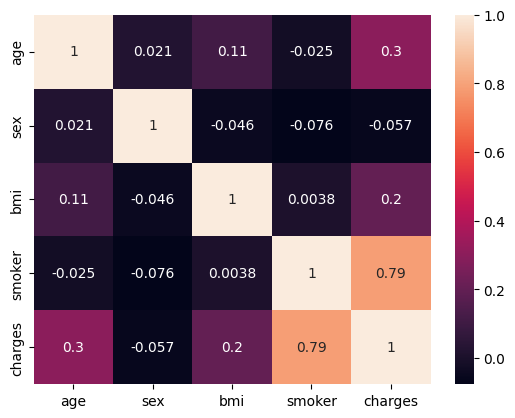

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
data=data.drop(["sex"],axis=1)

In [18]:
x=data.drop(["charges"],axis=1)
y=data["charges"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(x_test)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7776932310583375

In [25]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=42)

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([ 9153.15218781,  7075.64369868, 33225.11893279,  9470.74231634,
       29691.28136522,  6323.29198725,  3338.88671434, 16474.90335849,
        6756.33359225, 10647.33497772, 20349.22271204,  8470.21790652,
        5375.30712027, 49206.60892992, 52822.33168294, 46551.13665851,
       10020.21976176, 43864.51106135,  9646.02039121, 27571.80809345,
        4285.8622324 ,  9259.18467464,  3537.63960675,  4875.02041566,
       10908.00500171, 12754.95331901, 15070.78154251,  5048.37083685,
        9825.1999875 ,  3333.38636019,  8046.49550691, 13740.98736263,
        4509.52628519,  6026.22531086,  4791.66089106,  9740.7897809 ,
        3495.28922488,  8957.53687101, 24870.33462657, 38747.79352925,
        3309.44802798,  4201.05922628, 13601.03517096, 13772.84810658,
        6938.64964448, 13967.94687064,  4349.47820468,  4262.55738996,
       41797.54077529,  6533.12105046, 16217.1844223 ,  3230.64658142,
        8081.66147396,  2958.32232702, 13577.78929476, 11354.26876984,
      

In [30]:
r2_score(y_test,y_pred)

0.8614998676151889